In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Create a data set
---

In [6]:
np.unravel_index(np.arange(9).reshape((3, 3)).argmax(), (3, 3))

(2, 2)

In [105]:
class ImageManifold(object):
    
    @property
    def image_dim(self):
        return self.width, self.height
    
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def project_image(self, X):
        return self.coords_to_image(self.project_coords(self.image_to_coords(X)))

    def image_to_coords(self, img):
        c = np.empty((img.shape[0], 2))
        for i in range(img.shape[0]):
            x, y = np.unravel_index(np.argmax(img[i]), self.image_dim)
            c[i] = (float(x) / self.width - 1) * 2, (float(y) / self.height - 1) * 2,
        return c
    
    def coords_to_image(self, X):
        img = np.zeros((X.shape[0], self.width, self.height))
        x, y = X[:, 0], X[:, 1]
        x = np.ceil(((x + 1) / 2) * self.width).astype('int')
        y = np.ceil(((y + 1) / 2) * self.height).astype('int')
        for i in range(X.shape[0]):
            img[i, x[i] - 1, y[i] - 1] = 1
        return img

    def project_coords(self, X):
        abstract
    

class CircleManifold(ImageManifold):
    
    def __init__(self, center, radius, width, height):
        self.center = center
        self.radius = radius
        super(CircleManifold, self).__init__(width, height)
        
    def project_coords(self, X):
        R = X - self.center[np.newaxis]
        R /= np.sqrt((R ** 2).sum(1)[:, np.newaxis])
        R *= self.radius
        R += self.center
        return R

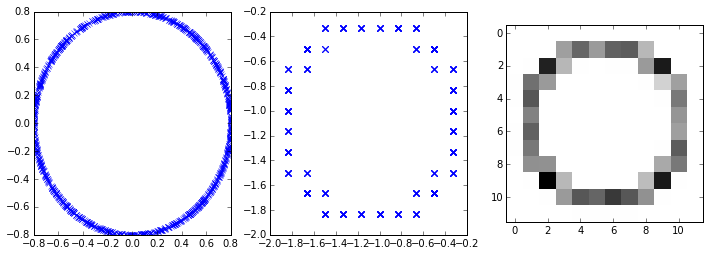

In [176]:
c = CircleManifold(np.array((0, 0)), .8, 12, 12)

X = (np.random.random((1000, 2)) - .5) * 2
X = c.project_coords(X)
I = c.coords_to_image(X)
X2 = c.image_to_coords(I)

fig, axs = plt.subplots(1, 3, figsize=(12, 4), squeeze=False)

axs[0][0].plot(X[:, 0], X[:, 1], 'x')
axs[0][1].plot(X2[:, 0], X2[:, 1], 'x')

axs[0][2].imshow(I.sum(0), cmap='binary', interpolation='none')

In [177]:
def rollout(image_manifold, start, controls):
    coords = np.empty((controls.shape[0], 2))
    coords[0] = image_manifold.project_coords(np.array(start, dtype='float'))
    for i in range(1, coords.shape[0]):
        coords[i] = image_manifold.project_coords(coords[i - 1] + controls[i])
    return coords, image_manifold.coords_to_image(coords)

In [178]:
coords[0]

array([ 0.53813824,  0.59195206])

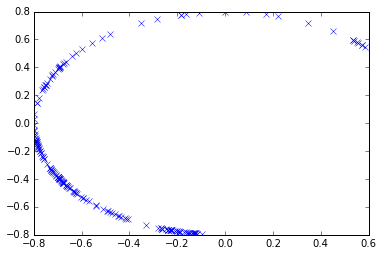

In [182]:
controls = np.add.accumulate(np.random.normal(0, .05, (200, 2)))
coords, images = rollout(c, [10, 11],  controls)
plt.plot(coords[:, 0], coords[:, 1], 'x')

In [183]:
from lessmueller import display

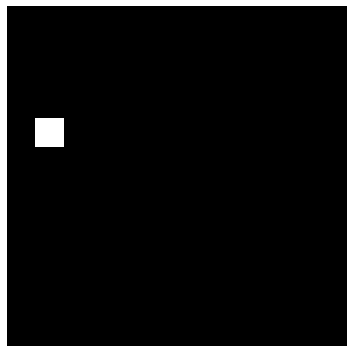

In [184]:
ani = display.ani_frame(images, cmap='binary_r')
ani.save('/Users/bayerj/Desktop/circlewalk.gif', writer='imagemagick', fps=25);